<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/11_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단순 선형 회귀(Linear Regression) 시계열 예측


yfinance 설치 (Colab에서 실행 시 필요)

In [1]:
!pip install yfinance --upgrade --no-cache-dir

모듈 import

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)

In [3]:
#df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = yf.download("TSLA", start="2010-01-01", end="2024-01-01")

/tmp/ipython-input-3217376614.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2010-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


데이터프레임 변환

In [4]:
df = df.reset_index()

독립 변수(Feature) 생성: 날짜를 숫자로 변환

In [5]:
df["Day"] = np.arange(len(df))

독립 변수(X)와 종속 변수(Y) 정의

In [6]:
X = df[["Day"]]  # 날짜를 독립 변수로 사용
y = df["Close"]  # 종속 변수: TSLA 종가

데이터 분할 (80% 학습, 20% 테스트)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

단순 선형 회귀 모델 학습

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

예측 수행

In [9]:
y_pred = model.predict(X_test)

결과 시각화

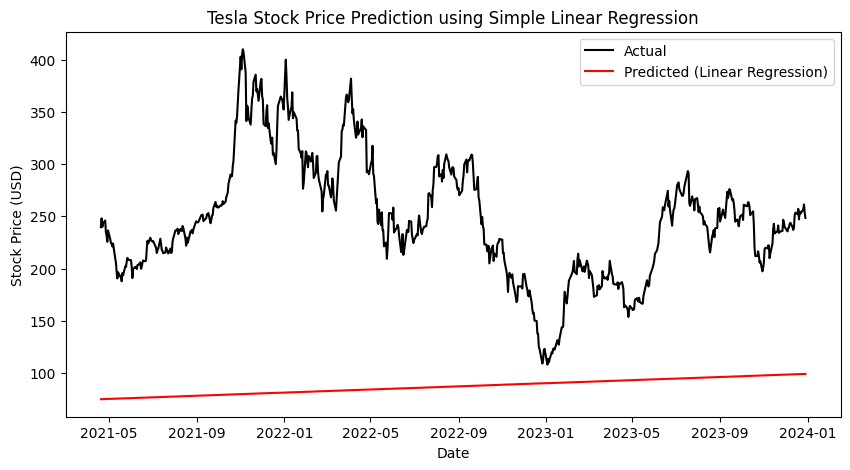

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test, label="Actual", color="black")
plt.plot(df["Date"].iloc[len(X_train):], y_pred, label="Predicted (Linear Regression)", color="red")
plt.title("Tesla Stock Price Prediction using Simple Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


# 슬라이딩 윈도우 적용 ( 단순 선형 회귀 모델)

모듈 import

In [11]:
# yfinance를 사용하여 테슬라(TSLA) 주가 데이터를 다운로드하고,
# 슬라이딩 윈도우 방식으로 80% 학습 / 20% 테스트 예측을 수행하는 코드

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)

In [12]:
# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2010-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()

/tmp/ipython-input-3051408040.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2010-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Feature 생성: 날짜를 숫자로 변환

In [13]:
# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

학습(train) / 테스트(test) 데이터 분할 (80:20)

In [14]:
# 📌 3️⃣ 학습(train) / 테스트(test) 데이터 분할 (80:20)
X = df[["Day"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Feature 생성: 날짜를 숫자로 변환

In [15]:
# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 학습(train) / 테스트(test) 데이터 분할 (80:20)
X = df[["Day"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

80% 학습 구간: 슬라이딩 윈도우 방식으로 학습

In [16]:
# 📌 4️⃣ 80% 학습 구간: 슬라이딩 윈도우 방식으로 학습
window_size = 30  # 최소 학습 기간 (30일)
train_predictions = []

for i in range(window_size, len(X_train) - 1):
    # 매번 새로운 데이터를 포함하여 학습 (슬라이딩 윈도우 적용)
    X_train_sliding = X_train.iloc[: i]
    y_train_sliding = y_train.iloc[: i]

    # 테스트할 데이터 (하루 뒤 예측)
    X_train_next = X_train.iloc[i : i + 1]

    # 📌 단순 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_train_sliding, y_train_sliding)

    # 📌 예측 수행
    y_train_pred = model.predict(X_train_next)

    # 📌 예측값 저장
    train_predictions.append(y_train_pred[0])

20% 테스트 구간: 슬라이딩 윈도우 방식으로 예측 수행

In [17]:
# 📌 5️⃣ 20% 테스트 구간: 슬라이딩 윈도우 방식으로 예측 수행
test_predictions = []
actuals = []

for i in range(window_size, len(X_test) - 1):
    # 매번 새로운 데이터를 포함하여 학습 (슬라이딩 윈도우 적용)
    X_train_sliding = pd.concat([X_train, X_test.iloc[: i]])  # 기존 학습 데이터 + 테스트 데이터 일부
    y_train_sliding = pd.concat([y_train, y_test.iloc[: i]])

    # 테스트할 데이터 (하루 뒤 예측)
    X_test_next = X_test.iloc[i : i + 1]

    # 📌 단순 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_train_sliding, y_train_sliding)

    # 📌 예측 수행
    y_test_pred = model.predict(X_test_next)

    # 📌 실제값과 예측값 저장
    test_predictions.append(y_test_pred[0])
    actuals.append(y_test.iloc[i + 1])

성능 평가 (테스트 데이터 기준)

In [18]:
# 📌 6️⃣ 성능 평가 (테스트 데이터 기준)
mse = mean_squared_error(actuals, test_predictions)
r2 = r2_score(actuals, test_predictions)

print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 R-squared (R²): {r2:.4f}")


📌 Mean Squared Error (MSE): 14516.2265
📌 R-squared (R²): -3.2413


결과 시각화 (훈련 데이터 예측 vs 실제값)

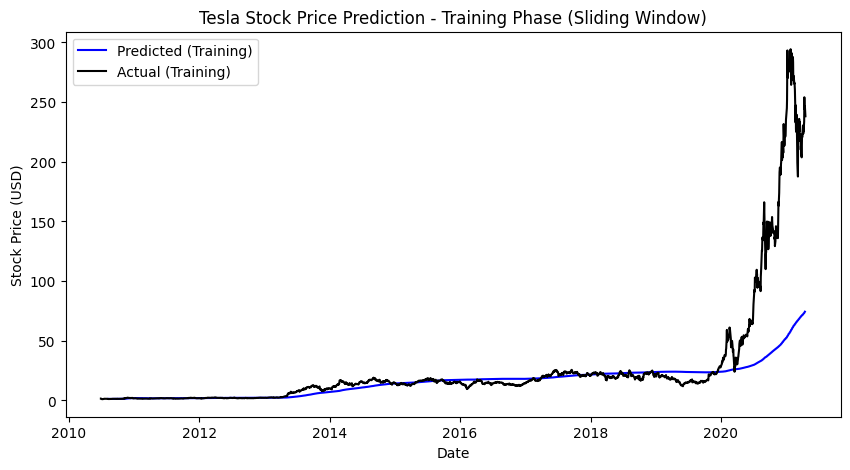

In [19]:
# 📌 7️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(10, 5))
plt.plot(df["Date"].iloc[window_size: len(X_train) - 1], train_predictions, label="Predicted (Training)", color="blue")
plt.plot(df["Date"].iloc[: len(X_train)], y_train, label="Actual (Training)", color="black")
plt.title("Tesla Stock Price Prediction - Training Phase (Sliding Window)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


결과 시각화 (테스트 데이터 예측 vs 실제값)

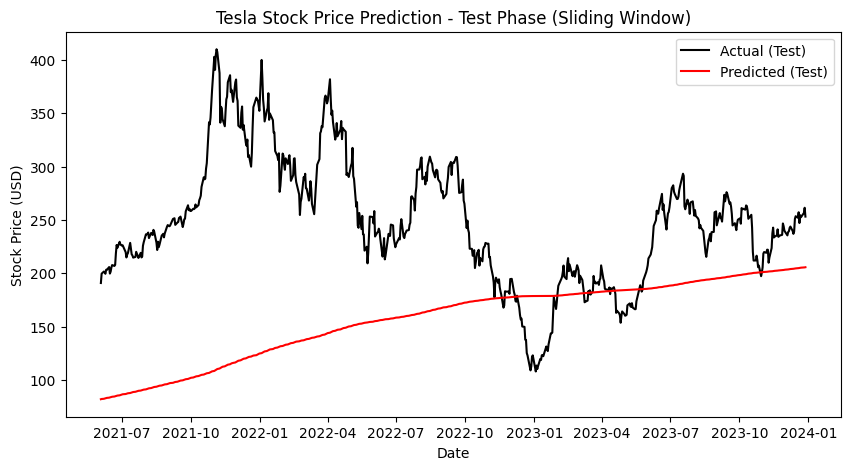

In [20]:
# 📌 8️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(10, 5))

# Ensure both x and y data have the same length
x_data = df["Date"].iloc[len(X_train) + window_size + 1: len(X_train) + window_size + 1 + len(actuals) -1 ] #Adjusted to ensure same length
plt.plot(x_data, actuals[:-1], label="Actual (Test)", color="black") # Adjusted actuals to ensure same length

x_data = df["Date"].iloc[len(X_train) + window_size + 1: len(X_train) + window_size + 1 + len(test_predictions) -1 ] # Adjusted to ensure same length
plt.plot(x_data, test_predictions[:-1], label="Predicted (Test)", color="red") # Adjusted test_predictions to ensure same length

plt.title("Tesla Stock Price Prediction - Test Phase (Sliding Window)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


# 전체(Full series, 내표본) 2) 고정 원점(정적 파라미터) 3) 롤링 윈도우 4) 확장 윈도우 예측

[INFO] design mode = custom_X, samples=3400, test_size=60, rolling_window=120


,MAE,RMSE,MAPE(%),R2
Full-Series (IS all),51.5721,64.5252,605.4758,0.5956
Full-Series (IS test),33.4177,37.4684,13.6364,-3.4706
Fixed-Origin,35.7218,39.6558,14.6031,-4.0078
Rolling,25.5441,30.7969,11.1997,-2.0203
Expanding,34.5896,38.5615,14.1310,-3.7352


,y_true,full_series(IS),fixed_origin,rolling,expanding
3340,260.049988,201.357100,198.938893,281.445341,198.938893
3341,260.529999,201.436882,199.017585,281.575419,199.090750
3342,259.670013,201.516664,199.096276,281.724820,199.243010
3343,263.619995,201.596447,199.174968,281.768031,199.394070
3344,262.989990,201.676229,199.253659,281.847681,199.549685


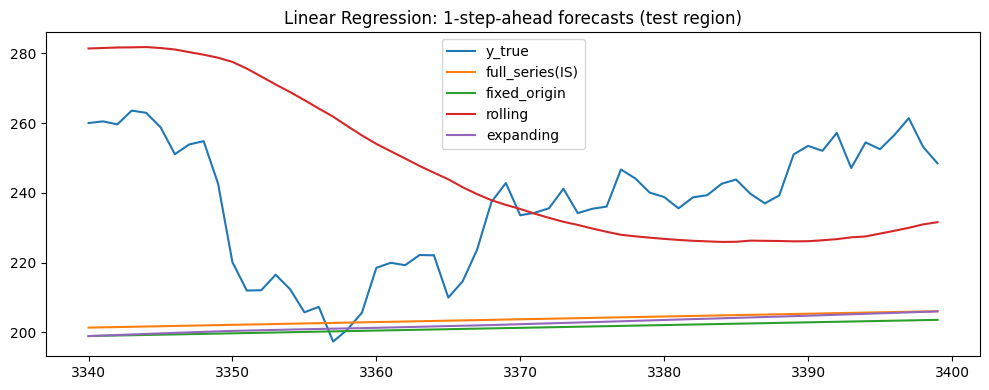

In [24]:
# ===============================================================
# 단순 선형 회귀(Linear Regression) 시계열 예측 - 4 스킴 한 번에
#   1) Full-series (내표본)
#   2) Fixed-origin (정적 파라미터, 1-스텝 OOS)
#   3) Rolling window (리핏, 1-스텝 OOS)
#   4) Expanding window (리핏, 1-스텝 OOS)
#
# 특징:
#  - df/X/y 자동 감지 (없으면 df에서 y/x 후보 자동 선택)
#  - x가 없으면 lag1(AR1) → 실패 시 추세(t)로 "단순선형회귀" 유지
#  - sklearn 구버전 호환: RMSE 계산 시 squared=False 미지원도 자동 처리
# 출력:
#  - preds(DataFrame), metrics(DataFrame), 간단 plot, CSV 저장
# ===============================================================
from typing import Optional, Tuple, Dict
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display
import matplotlib.pyplot as plt

# --------------------------
# ★ 필요 시 여기만 수정 ★
# --------------------------
TEST_SIZE      = 60          # 테스트(평가) 구간 길이
ROLLING_WINDOW = None        # None이면 자동(min(120, 학습길이)). 직접 지정 가능(예: 120)
FIT_INTERCEPT  = True

# 명시적으로 df에서 타깃/설명 컬럼을 지정하고 싶을 때:
Y_COL: Optional[str] = None   # 예: "Close"  (None이면 자동 감지)
X_COL: Optional[str] = None   # 예: "Day"    (None이면 자동 감지: Day -> lag1 -> trend)

# ------------------------------------------------------------
# 도우미: 지표, 설계행렬 구성, 자동 감지
# ------------------------------------------------------------
def _safe_rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """sklearn 버전에 따라 squared=False 미지원 시에도 동작하도록 RMSE 계산"""
    try:
        return mean_squared_error(y_true, y_pred, squared=False)  # 신버전
    except TypeError:
        return float(np.sqrt(mean_squared_error(y_true, y_pred)))  # 구버전

def _metrics(y_true: np.ndarray, y_pred: np.ndarray) -> Dict[str, float]:
    eps = 1e-12
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": _safe_rmse(y_true, y_pred),
        "MAPE(%)": float(np.mean(np.abs((y_true - y_pred) / np.where(np.abs(y_true)<eps, eps, y_true))) * 100.0),
        "R2": r2_score(y_true, y_pred),
    }

def _ensure_2d(X) -> pd.DataFrame:
    """Series/ndarray -> 2D DataFrame 보장"""
    if isinstance(X, pd.DataFrame):
        return X
    if isinstance(X, pd.Series):
        return X.to_frame(name=getattr(X, "name", "x"))
    X = np.asarray(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    return pd.DataFrame(X, columns=[f"x{i}" for i in range(X.shape[1])])

def _as_series(obj, name="y") -> pd.Series:
    """ndarray도 Series로, index는 보존되면 재사용"""
    if isinstance(obj, pd.Series):
        return pd.to_numeric(obj, errors="coerce")
    if isinstance(obj, pd.DataFrame):
        # 1열만 있을 때
        if obj.shape[1] == 1:
            return pd.to_numeric(obj.iloc[:,0], errors="coerce").rename(name)
        raise ValueError("y로 DataFrame을 전달하려면 단일 컬럼이어야 합니다.")
    arr = np.asarray(obj).reshape(-1)
    return pd.Series(arr, name=name)

def _auto_pick_from_df(df: pd.DataFrame, y_col: Optional[str], x_col: Optional[str]) -> Tuple[pd.Series, pd.Series|None]:
    """df에서 y/x 컬럼 자동 선택: y 우선순위, x 우선순위"""
    # Date/DATETIME 인덱스 정리
    idx = df.index
    if "Date" in df.columns and not isinstance(idx, pd.DatetimeIndex):
        try:
            idx = pd.to_datetime(df["Date"])
        except Exception:
            pass

    # 후보군
    y_candidates = [y_col] if y_col else ["y", "Y", "target", "Target", "Close", "close", "value", "Value"]
    x_candidates = [x_col] if x_col else ["x", "X", "Day", "day", "t", "T", "time", "Time", "index", "Index"]

    y_series = None
    for c in y_candidates:
        if c and c in df.columns:
            y_series = pd.to_numeric(df[c], errors="coerce")
            break
    if y_series is None:
        # 숫자형 컬럼 중 첫 번째 선택
        num_cols = [c for c in df.select_dtypes(include=[np.number]).columns]
        if num_cols:
            y_series = pd.to_numeric(df[num_cols[0]], errors="coerce")
        else:
            raise ValueError("df에서 y로 사용할 숫자형 컬럼을 찾지 못했습니다. Y_COL을 지정하세요.")

    x_series = None
    for c in x_candidates:
        if c and c in df.columns and c != y_series.name and pd.api.types.is_numeric_dtype(df[c]):
            x_series = pd.to_numeric(df[c], errors="coerce")
            break

    # 인덱스 세팅
    y_series.index = idx
    if x_series is not None:
        x_series.index = idx

    return y_series.rename("y"), None if x_series is None else x_series.rename("x")

def _build_design_simple_linear(y: pd.Series,
                                x: Optional[pd.Series],
                                fallback: str = "lag1_then_trend") -> Tuple[pd.DataFrame, pd.Series, str]:
    """
    단순 선형 회귀용 설계행렬:
      - x가 있으면 y ~ x
      - x가 없으면 fallback 전략:
          'lag1_then_trend'  : y ~ lag_1, 실패 시 y ~ t
          'trend'            : y ~ t
    반환: (X, y, used_mode)  used_mode in {"x","lag1","trend"}
    """
    y = pd.to_numeric(pd.Series(y).dropna(), errors="coerce")
    used = None
    if x is not None:
        x = pd.to_numeric(pd.Series(x).reindex(y.index), errors="coerce")
        X = x.to_frame("x")
        valid = ~(X.isna().any(axis=1) | y.isna())
        used = "x"
        return X.loc[valid], y.loc[valid], used

    if fallback == "lag1_then_trend":
        # lag1 시도
        lag1 = y.shift(1).rename("lag1")
        X = lag1.to_frame()
        valid = ~(X.isna().any(axis=1) | y.isna())
        if valid.sum() >= 10:  # 최소 표본
            used = "lag1"
            return X.loc[valid], y.loc[valid], used
        # 추세 회귀
        t = pd.Series(np.arange(len(y), dtype=float), index=y.index, name="t")
        X = t.to_frame()
        valid = ~(X.isna().any(axis=1) | y.isna())
        used = "trend"
        return X.loc[valid], y.loc[valid], used

    # 강제 추세
    t = pd.Series(np.arange(len(y), dtype=float), index=y.index, name="t")
    X = t.to_frame()
    valid = ~(X.isna().any(axis=1) | y.isna())
    used = "trend"
    return X.loc[valid], y.loc[valid], used

# ------------------------------------------------------------
# 고정원점/롤링/확장 예측기
# ------------------------------------------------------------
def _full_series_is(X: pd.DataFrame, y: pd.Series, fit_intercept=True) -> np.ndarray:
    m = LinearRegression(fit_intercept=fit_intercept)
    m.fit(X, y)
    return m.predict(X)

def _fixed_origin(X: pd.DataFrame, y: pd.Series, test_size: int, fit_intercept=True):
    n = len(y); split = n - test_size
    X_tr, y_tr = X.iloc[:split, :], y.iloc[:split]
    X_te, y_te = X.iloc[split:, :], y.iloc[split:]
    m = LinearRegression(fit_intercept=fit_intercept)
    m.fit(X_tr, y_tr)
    yhat = m.predict(X_te)
    return y_te.index, y_te.to_numpy(), yhat

def _rolling_window(X: pd.DataFrame, y: pd.Series, test_size: int, window: int, fit_intercept=True):
    n = len(y); test_start = n - test_size
    idxs, ytrue, yhat = [], [], []
    for t in range(test_start, n):
        tr_start = max(0, t - window)
        X_tr, y_tr = X.iloc[tr_start:t, :], y.iloc[tr_start:t]
        X_te = X.iloc[t:t+1, :]
        m = LinearRegression(fit_intercept=fit_intercept)
        m.fit(X_tr, y_tr)
        yhat.append(m.predict(X_te)[0])
        ytrue.append(y.iloc[t])
        idxs.append(y.index[t])
    return pd.Index(idxs), np.array(ytrue), np.array(yhat)

def _expanding_window(X: pd.DataFrame, y: pd.Series, test_size: int, fit_intercept=True):
    n = len(y); test_start = n - test_size
    idxs, ytrue, yhat = [], [], []
    for t in range(test_start, n):
        X_tr, y_tr = X.iloc[:t, :], y.iloc[:t]
        X_te = X.iloc[t:t+1, :]
        m = LinearRegression(fit_intercept=fit_intercept)
        m.fit(X_tr, y_tr)
        yhat.append(m.predict(X_te)[0])
        ytrue.append(y.iloc[t])
        idxs.append(y.index[t])
    return pd.Index(idxs), np.array(ytrue), np.array(yhat)

# ------------------------------------------------------------
# 0) 데이터 자동 감지 (df, X, y → 우선 사용)
# ------------------------------------------------------------
y_series: Optional[pd.Series] = None
x_series: Optional[pd.Series] = None
X_design: Optional[pd.DataFrame] = None

_glob = globals()

# 0-1) 우선순위: 이미 만든 y/X가 있으면 그대로 사용
if "y" in _glob:
    try:
        y_series = _as_series(_glob["y"], name="y")
    except Exception:
        y_series = None

if "X" in _glob and y_series is not None:
    try:
        X_design = _ensure_2d(_glob["X"]).reindex(y_series.index)
    except Exception:
        X_design = None

# 0-2) df 기반 자동 탐지
if y_series is None or X_design is None:
    if "df" in _glob:
        _df = _glob["df"].copy()
        y_series2, x_series2 = _auto_pick_from_df(_df, Y_COL, X_COL)
        # y는 무조건 채움
        if y_series is None:
            y_series = y_series2
        # X가 없을 때만 x_series로 단순 선형회귀
        if X_design is None and x_series2 is not None:
            x_series = x_series2

# 0-3) 여전히 y가 없으면 에러
if y_series is None:
    raise RuntimeError("타깃 y를 찾지 못했습니다. df/Y_COL 또는 y 변수를 준비해 주세요.")

# ------------------------------------------------------------
# 1) 단순 선형회귀 설계행렬 구성 (x가 없으면 lag1 또는 trend 사용)
# ------------------------------------------------------------
if X_design is None:
    X_design, y_clean, used_mode = _build_design_simple_linear(y_series, x_series, fallback="lag1_then_trend")
else:
    # 다중특성 X(이미 생성됨)
    X_design = X_design.astype(float)
    y_clean  = y_series.astype(float).reindex(X_design.index)
    valid = ~(X_design.isna().any(axis=1) | y_clean.isna())
    X_design, y_clean = X_design.loc[valid], y_clean.loc[valid]
    used_mode = "custom_X"

n = len(y_clean)
assert 1 <= TEST_SIZE < n, f"TEST_SIZE(={TEST_SIZE})는 1~{n-1} 사이여야 합니다."
test_start = n - TEST_SIZE
test_index = y_clean.index[test_start:]

# ------------------------------------------------------------
# 2) 4 스킴 실행
# ------------------------------------------------------------
# Full-series (IS 전체/IS 테스트절단)
yhat_is_all  = _full_series_is(X_design, y_clean, fit_intercept=FIT_INTERCEPT)
yhat_is_test = yhat_is_all[test_start:]

# Fixed-origin
idx_fo, y_true_fo, yhat_fo = _fixed_origin(X_design, y_clean, test_size=TEST_SIZE, fit_intercept=FIT_INTERCEPT)

# Rolling
if ROLLING_WINDOW is None:
    ROLLING_WINDOW = min(120, n - TEST_SIZE)
idx_rw, y_true_rw, yhat_rw = _rolling_window(X_design, y_clean, test_size=TEST_SIZE, window=ROLLING_WINDOW, fit_intercept=FIT_INTERCEPT)

# Expanding
idx_ex, y_true_ex, yhat_ex = _expanding_window(X_design, y_clean, test_size=TEST_SIZE, fit_intercept=FIT_INTERCEPT)

# ------------------------------------------------------------
# 3) 결과 취합 & 지표
# ------------------------------------------------------------
preds = pd.DataFrame(index=test_index)
preds["y_true"]            = y_clean.iloc[test_start:].to_numpy()
preds["full_series(IS)"]   = yhat_is_test
preds["fixed_origin"]      = pd.Series(yhat_fo, index=idx_fo)
preds["rolling"]           = pd.Series(yhat_rw, index=idx_rw)
preds["expanding"]         = pd.Series(yhat_ex, index=idx_ex)

metrics = pd.DataFrame({
    "Full-Series (IS all)" : _metrics(y_clean.to_numpy(), yhat_is_all),
    "Full-Series (IS test)": _metrics(preds["y_true"].to_numpy(), preds["full_series(IS)"].to_numpy()),
    "Fixed-Origin"         : _metrics(preds["y_true"].to_numpy(), preds["fixed_origin"].to_numpy()),
    "Rolling"              : _metrics(preds["y_true"].to_numpy(), preds["rolling"].to_numpy()),
    "Expanding"            : _metrics(preds["y_true"].to_numpy(), preds["expanding"].to_numpy()),
}).T

# ------------------------------------------------------------
# 4) 표시 및(선택) 저장
# ------------------------------------------------------------
print(f"[INFO] design mode = {used_mode}, samples={n}, test_size={TEST_SIZE}, rolling_window={ROLLING_WINDOW}")
display(metrics.round(4))
display(preds.head())

# 간단 시각화 (테스트 구간)
plt.figure(figsize=(10,4))
plt.plot(preds.index, preds["y_true"], label="y_true")
plt.plot(preds.index, preds["full_series(IS)"], label="full_series(IS)")
plt.plot(preds.index, preds["fixed_origin"], label="fixed_origin")
plt.plot(preds.index, preds["rolling"], label="rolling")
plt.plot(preds.index, preds["expanding"], label="expanding")
plt.title("Linear Regression: 1-step-ahead forecasts (test region)")
plt.legend()
plt.tight_layout()
plt.show()

# 파일로 저장(원하면 경로 바꾸세요)
#preds.to_csv("forecast_preds_linear.csv", index=True)
#metrics.to_csv("forecast_metrics_linear.csv", index=True)
#print("[INFO] saved: forecast_preds_linear.csv, forecast_metrics_linear.csv")
